In [ ]:
%pip install seaborn
%pip install matplotlib
%pip install pandas

In [50]:
import matplotlib.pyplot as plt

In [2]:
import os

os.chdir(r"C:\Users\robbe\Documents\KULeuven\Bioinformatics_2024-2025\Statistical_Methods\Part II")

In [3]:
import pandas as pd
df = pd.read_csv("Assignment/Cortex3.csv")
print(df.shape)        # number of samples and columns
print(df.head())       # preview rows


(70, 73)
   DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.427989  0.611945  0.316096  2.057295  3.450930  0.288470  0.179682   
1  0.274969  0.538051  0.321415  2.350008  3.681566  0.277864  0.195006   
2  0.318280  0.471401  0.324946  2.585867  4.048926  0.264531  0.207836   
3  0.413631  0.579576  0.345870  2.360047  4.544935  0.225490  0.212180   
4  0.602479  0.663114  0.371800  2.369098  4.433458  0.244078  0.215207   

   pCAMKII_N   pCREB_N    pELK_N  ...    SNCA_N  Ubiquitin_N  pGSK3B_Tyr216_N  \
0   2.539125  0.192975  1.556223  ...  0.192071     1.319323         0.739725   
1   2.809781  0.258243  1.183554  ...  0.155201     1.379009         0.782226   
2   3.697912  0.241246  1.357533  ...  0.196178     1.451962         0.877407   
3   2.677465  0.202960  1.427544  ...  0.110186     0.958435         0.820530   
4   2.669999  0.165503  1.875758  ...  0.150344     1.084034         0.664749   

      SHH_N     pS6_N     SYP_N    CaNA_N  Genotype  

Unsupervised exploration (PCA)

Visualize sample‐to‐sample variation and check for outliers, batch effects or gross separation by Treatment, Genotype or Behavior.

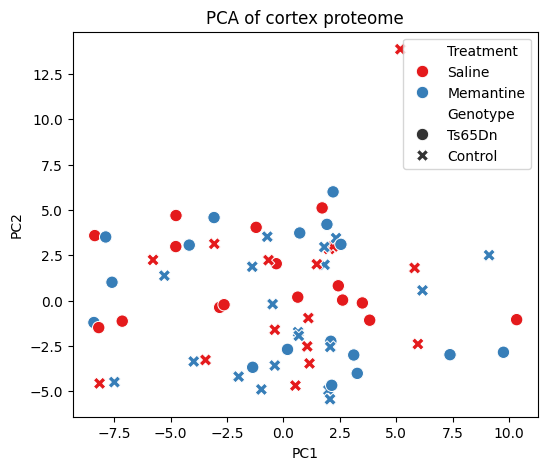

In [51]:


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# scale protein matrix
X_scaled = StandardScaler().fit_transform(df.filter(regex='_N'))
pcs = PCA(2).fit_transform(X_scaled)

plt.figure(figsize=(6,5))
sns.scatterplot(x=pcs[:,0], y=pcs[:,1],
                hue=df['Treatment'], style=df['Genotype'],
                s=80, palette='Set1')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.title('PCA of cortex proteome')
plt.show()

In [4]:
#Check missing values and types: Verify no missing data and correct types.
print(df.isnull().sum()) # count missing per column
print(df.dtypes) # data types of columns


DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
SYP_N        0
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
Length: 73, dtype: int64
DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
NR2A_N       float64
              ...   
SYP_N        float64
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
Length: 73, dtype: object


In [5]:
# Explore summary statistics: Get descriptive stats of protein levels:
print(df.describe()) # mean, std, quantiles of numeric features

        DYRK1A_N    ITSN1_N     BDNF_N      NR1_N     NR2A_N     pAKT_N  \
count  70.000000  70.000000  70.000000  70.000000  70.000000  70.000000   
mean    0.428313   0.619427   0.324609   2.340231   3.947435   0.239281   
std     0.243243   0.234685   0.037469   0.251004   0.659236   0.037592   
min     0.179513   0.340665   0.234985   1.714165   2.486368   0.152286   
25%     0.286172   0.497185   0.300939   2.182133   3.573663   0.206356   
50%     0.378421   0.572216   0.321284   2.364597   3.943376   0.239711   
75%     0.487118   0.681567   0.349877   2.508762   4.338222   0.264259   
max     2.048408   2.113230   0.417596   2.806805   5.720960   0.338203   

         pBRAF_N  pCAMKII_N    pCREB_N     pELK_N  ...    P3525_N   pCASP9_N  \
count  70.000000  70.000000  70.000000  70.000000  ...  70.000000  70.000000   
mean    0.186127   3.204412   0.210690   1.432915  ...   0.289683   1.554944   
std     0.022797   0.881505   0.029221   0.401481  ...   0.026735   0.215115   
min 

Text(0.5, 1.0, 'Protein expression correlations')

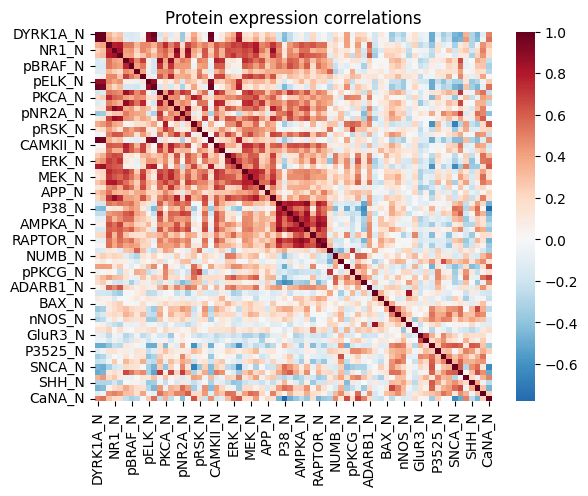

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select columns ending with '_N' (protein measurements)
protein_cols = [col for col in df.columns if col.endswith('_N')]
corr = df[protein_cols].corr()
sns.heatmap(corr, cmap="RdBu_r", center=0)
plt.title("Protein expression correlations")


In [ ]:
# Class distribution: Check how many samples in each Treatment class:
print(df['Treatment'].value_counts())


Treatment
Memantine    38
Saline       32
Name: count, dtype: int64


## Model comparison
Prepare the data for classification of treatment (Memantine=1, Saline=0) 

In [21]:
# Preprocessing and split: Define feature matrix X (protein expressions) and label y (Treatment).
X = df.filter(regex='_N').values # all protein columns
y = (df['Treatment'] == 'Memantine').astype(int).values

In [24]:
X.shape, y.shape # check dimensions of X and y

((70, 70), (70,))

In [ ]:
#Split into train/test sets with stratification:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, stratify=y, test_size=0.3, random_state=42
)


Stability & cross‐validation of your classifiers

Instead of a single train/test split, do a 5-fold CV of AUC for each model to see variance in performance.

In [ ]:

from sklearn.model_selection import cross_val_score

for name, model in [('LASSO', lasso), ('GAM', gam), ('GB', gb)]:
    if hasattr(model, 'predict_proba'):
        scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    else:
        # for GAM you may need to wrap its predict_proba
        scores = cross_val_score(model, X, y, cv=5,
                                 scoring=lambda m, X, y: roc_auc_score(y, m.predict_proba(X)))
    print(f"{name} 5-fold AUC: {scores.mean():.3f} ± {scores.std():.3f}")

Model 1 – LASSO (Logistic L1): 
Fit a logistic regression with L1 penalty (LASSO) to perform feature selection and classification. 
Using scikit-learn’s LogisticRegressionCV with 5-fold CV:

In [25]:
from sklearn.linear_model import LogisticRegressionCV
lasso = LogisticRegressionCV(
Cs=10, cv=5, penalty='l1', solver='saga', scoring='roc_auc',
max_iter=10000, random_state=42
)
lasso.fit(X_train, y_train)


LogisticRegressionCV(cv=5, max_iter=10000, penalty='l1', random_state=42,
                     scoring='roc_auc', solver='saga')

In [ ]:
# Inspect lasso.coef_ to see which proteins are selected (nonzero)


Model 2 – Generalized Additive Model (GAM): Fit a GAM with logistic link to allow nonlinear
effects of proteins

In [57]:
from pygam import LogisticGAM, s
import numpy as np
from functools import reduce
import operator

# Get indices of top 5 nonzero LASSO coefficients
top_idx = np.argsort(np.abs(lasso.coef_[0]))[::-1][:5]
terms = reduce(operator.add, [s(i) for i in range(len(top_idx))])

# Fit GAM (quick, no gridsearch)
gam = LogisticGAM(terms).fit(X_train[:, top_idx], y_train)

Model 3 – Boosting (Gradient Boosted Trees): Use a gradient boosting classifier to capture
complex interactions.

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [38]:
from sklearn.metrics import roc_auc_score, confusion_matrix
# Example for LASSO:
y_prob_lasso = lasso.predict_proba(X_test)[:, 1]
y_pred_lasso = lasso.predict(X_test)
auc_lasso = roc_auc_score(y_test, y_prob_lasso)
cm_lasso = confusion_matrix(y_test, y_pred_lasso)
print("LASSO AUC:", auc_lasso)
print("LASSO Confusion Matrix:\n", cm_lasso)

LASSO AUC: 0.8999999999999999
LASSO Confusion Matrix:
 [[ 8  2]
 [ 1 10]]


C:\Users\robbe\AppData\Local\Temp\ipykernel_20044\1604727028.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette='viridis')


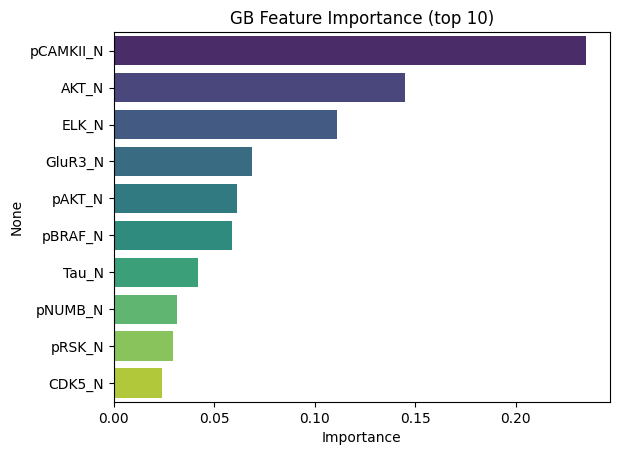

In [52]:

importances = pd.Series(gb.feature_importances_, index=protein_cols)
top10 = importances.nlargest(10)
sns.barplot(x=top10.values, y=top10.index, palette='viridis')
plt.title('GB Feature Importance (top 10)'); plt.xlabel('Importance'); plt.show()

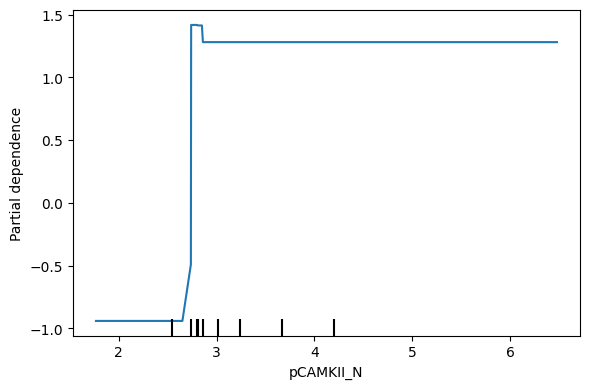

In [54]:
# - For one or two top hits try a partial‐dependence plot to check nonlinearity:

from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(6,4))
PartialDependenceDisplay.from_estimator(
    gb, X_train, [protein_cols.index(top10.index[0])],
    feature_names=protein_cols, ax=ax
)
plt.tight_layout(); plt.show()

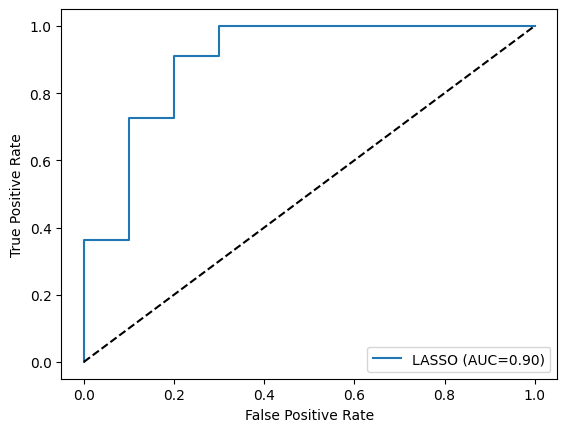

In [39]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_prob_lasso)
plt.plot(fpr, tpr, label=f"LASSO (AUC={auc_lasso:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.legend()


Biological Inference on Ts65Dn 
Focus on whether Memantine alters protein expression in the learning condition for trisomic mice
(Genotype='Ts65Dn', Behavior='C/S')

In [40]:
#Subset data: Filter the DataFrame for the relevant group:
subset = df[(df['Genotype']=='Ts65Dn') & (df['Behavior']=='C/S')]


In [41]:
print(subset['Treatment'].value_counts())


Treatment
Memantine    9
Saline       7
Name: count, dtype: int64


In [44]:
from scipy.stats import ttest_ind
proteins = [col for col in subset.columns if col.endswith('_N')]
pvals = []
for prot in proteins:
	mem = subset[subset['Treatment']=='Memantine'][prot]
	sal = subset[subset['Treatment']=='Saline'][prot]
	t_stat, p = ttest_ind(mem, sal, nan_policy='omit')
	pvals.append(p)


In [46]:
# False Discovery Rate (FDR): Benjamini–Hochberg
import statsmodels.stats.multitest as smm
reject, pvals_corr, _, _ = smm.multipletests(pvals, alpha=0.05,
method='fdr_bh')
significant = [proteins[i] for i, flag in enumerate(reject) if flag]
print("Significant proteins (FDR<0.05):", significant)


Significant proteins (FDR<0.05): []


In [48]:
import numpy as np
import matplotlib.pyplot as plt
# Compute mean difference (Memantine - Saline)
means = subset.groupby('Treatment')[proteins].mean()
diff = (means.loc['Memantine'] - means.loc['Saline']).dropna()
sig_diff = diff[significant]

if not sig_diff.empty:
	sig_diff.sort_values().plot(kind='bar', color='skyblue')
	plt.ylabel('Mean expression difference (Memantine - Saline)')
	plt.xticks(rotation=90)
	plt.title('Significantly affected proteins in Ts65Dn/C/S group')
	plt.show()
else:
	print("No significant proteins found (FDR < 0.05). Nothing to plot.")

No significant proteins found (FDR < 0.05). Nothing to plot.


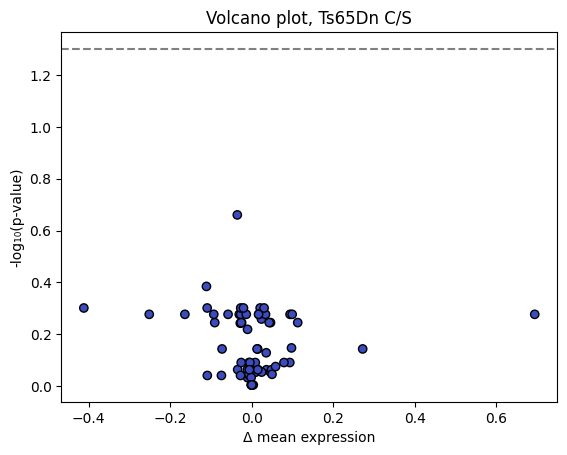

In [58]:

import numpy as np
effect = diff  # Memantine – Saline
logp = -np.log10(pvals_corr)
plt.scatter(effect, logp, c=reject, cmap='coolwarm', edgecolor='k')
plt.xlabel('Δ mean expression'); plt.ylabel('-log₁₀(p-value)')
plt.title('Volcano plot, Ts65Dn C/S'); plt.axhline(-np.log10(0.05), ls='--', color='grey'); plt.show()